# Assignment 3
- Donwload  ziptrain.csv and ziptest.csv datasets from  https://github.com/vahidpartovinia/ycbs255/

# 1- Differentiate digit 2 from Digit 7
## 1.1- Two principal components
- Select only digit 2, and digit 7 from ziptrain data set. 
- Project ziprain onto two principal components
- Make a scatterplot to confirm wheather or not only two principal components separates digit 2 from digit 7.

## 1.2- Logistic regression
- Fit a logistic regression to separate digit 2 from digit 7 over the projected 2 principal components.  Remember in logistic regression, classes are differentiated using 0 and 1 (and not 2 or 7).
- Build the confusion matrix on ziptest and check how well the model works on the test data.

# 2 -Multiple principal components
- Project train data onto "m = 2, 3, ..." principal components.
- Choose an "m" so that the classification of digit 2 and 7 is the most precise on ziptest.

# 3-Differentiate all digits 
- Project ziprain onto two principal components
- Make a scatterplot to confirm wheather or not only two principal components separates all digits properly.
- Use linear discriminant on ziptrain over 256 original pixels and build the confusion matrix of this model over ziptrain
- Use linear disciminant over "m" projected principal components, with the appropriate choice of "m" (where the precision of prediction maximizes over ziptest data set).


# Submission note
Please fill this jupyter notebook. Extract the pdf file as follows. On  Jupyter manue go to File/Print Preview, then on Browser menu go to File/Print. 

## Only PDF  Submissions will be graded


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Get Data

In [2]:
ziptrain = np.loadtxt(r"C:\Users\olive\Documents\GitHub\Computational-Applied-Statistics\Assignment 3\ziptrain.csv")
ziptest = np.loadtxt(r"C:\Users\olive\Documents\GitHub\Computational-Applied-Statistics\Assignment 3\ziptest.csv")

In [3]:
ziptrain2 = ziptrain[ziptrain[:, 0]==2]
ziptrain7 = ziptrain[ziptrain[:, 0]==7]
ziptrain27 = np.vstack([ziptrain2, ziptrain7])

In [4]:
ziptest2 = ziptest[ziptest[:, 0]==2]
ziptest7 = ziptest[ziptest[:, 0]==7]
ziptest27 = np.vstack([ziptest2, ziptest7])

# Project data into 2 principal components & scatterplot

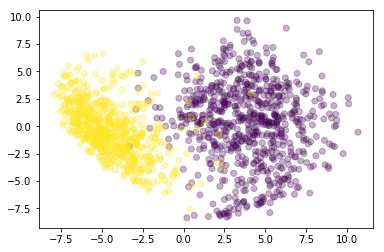

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(ziptrain27[:, 1:])
Z_train = pca.transform(ziptrain27[:, 1:])
plt.scatter(Z_train[:, 0], Z_train[:, 1], c=ziptrain27[:, 0], alpha=0.3)

### As can be seen above - the two principal components can be used to separate 2 from 7 reasonably well

# Logistic Regression

### Let 1.0 denote the character 7 and 0 the character 2:

In [6]:
y_train = np.array([1.0 if x==7 else 0 for x in ziptrain27[:, 0]])

In [7]:
from sklearn.linear_model import LogisticRegression
model_logreg = LogisticRegression()
model_logreg.fit(X=Z_train, y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Transform the test data:

In [8]:
Z_test = pca.transform(ziptest27[:, 1:])
y_test = np.array([1.0 if x==7 else 0 for x in ziptest27[:, 0]])

### Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix
y_pred = model_logreg.predict(Z_test)
confusion_matrix(y_test, y_pred)

array([[193,   5],
       [  7, 140]], dtype=int64)

### Logistic Regression seems to perform quite well...

# Multiple principal components

### Project into a number of principal components such that precision is high... Precision being the number of true positives divided by the sum of true positives and false positives

In [10]:
num_feats = len(ziptrain27[0, 1:])
prec = []
for m in range(2, num_feats):

    pca = PCA(n_components=m)
    pca.fit(ziptrain27[:, 1:])
    Z_train = pca.transform(ziptrain27[:, 1:])
    Z_test = pca.transform(ziptest27[:, 1:])
    
    model_logreg = LogisticRegression()
    model_logreg.fit(X=Z_train, y=y_train)
    y_pred = model_logreg.predict(Z_test)
    cm = confusion_matrix(y_test, y_pred)
    prec.append(cm[1,1]/(cm[1,1]+cm[0,1]))

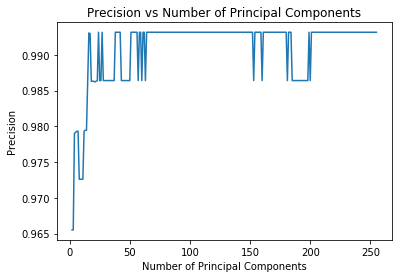

In [11]:
plt.plot(range(2, num_feats), prec)
plt.title("Precision vs Number of Principal Components")
plt.ylabel("Precision")
plt.xlabel("Number of Principal Components")
plt.show()

### It seems the precision flattens out a little after 50 components... Take m=75...

# PCA all digits to m=2 and display scatter to see if it's seperable:

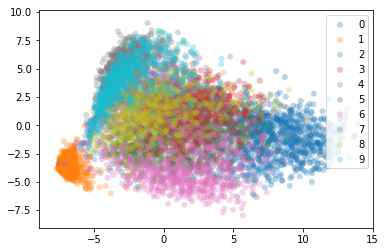

In [12]:
pca = PCA(n_components=2)
pca.fit(ziptrain[:, 1:])
Z_train = pca.transform(ziptrain[:, 1:])

fig, ax = plt.subplots()
for digit in np.unique(ziptrain[:, 0]):
    x = Z_train[ziptrain[:, 0]==digit, 0]
    y = Z_train[ziptrain[:, 0]==digit, 1]
    ax.scatter(x, y, label=int(digit),
               alpha=0.3, edgecolors='none')

ax.legend()

### It doesn't look like only two components separate all digits properly...

## Linear Discriminant:

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_lindisc = LinearDiscriminantAnalysis()
X_train = ziptrain[:, 1:]
y_train = ziptrain[:, 0]
model_lindisc.fit(X=X_train, y=y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

### Confusion Matrix:

In [14]:
X_test = ziptest[:, 1:]
y_test = ziptest[:, 0]
y_pred = model_lindisc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[342   0   0   4   3   1   5   0   3   1]
 [  0 251   0   2   5   0   3   0   1   2]
 [  7   2 157   4  12   2   1   1  12   0]
 [  3   0   3 142   3   9   0   1   4   1]
 [  1   4   6   0 174   0   2   2   1  10]
 [  6   0   0  16   3 125   0   0   5   5]
 [  1   0   3   0   3   3 157   0   3   0]
 [  0   1   0   2   7   0   0 129   1   7]
 [  5   0   2  11   7   4   0   0 135   2]
 [  0   0   0   0   4   0   0   5   3 165]]


# Find optimal "m":

### Since precision is defined for each class and we have multiple classes - I will optimize by finding the m value that optimizes the aggregated mean precision of all classes

In [15]:
def get_mean_precision(m):
    precision = []
    for i in range(0, len(m)):
        denom = 0
        num = 0
        for j in range(0, len(m[i])):
            denom += m[i, j]
            if j == i:
                num = m[i, j]
        precision.append(num/denom)
    return np.mean(precision)

In [16]:
num_feats = len(ziptrain[0, 1:])
prec = []

for m in range(2, num_feats):
    pca = PCA(n_components=m)
    pca.fit(ziptrain[:, 1:])
    Z_train = pca.transform(ziptrain[:, 1:])
    Z_test = pca.transform(ziptest[:, 1:])
    
    model_lindisc = LinearDiscriminantAnalysis()
    model_lindisc.fit(X=Z_train, y=y_train)
    y_pred = model_lindisc.predict(Z_test)
    cm = confusion_matrix(y_test, y_pred)
    prec.append([int(m), get_mean_precision(cm)])

prec = np.array(prec)

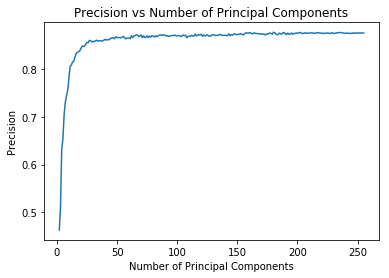

In [17]:
plt.plot(prec[:, 0], prec[:, 1])
plt.title("Precision vs Number of Principal Components")
plt.ylabel("Precision")
plt.xlabel("Number of Principal Components")
plt.show()

In [18]:
m_maximizer = int(prec[prec[:, 1]==np.max(prec[:, 1])][0][0])
print("Use m value of {} to maximize precision".format(m_maximizer))

Use m value of 180 to maximize precision


# Finally - perform the linear discriminant with m_maximizer

In [19]:
pca = PCA(n_components=m_maximizer)
pca.fit(ziptrain[:, 1:])
Z_train = pca.transform(ziptrain[:, 1:])
Z_test = pca.transform(ziptest[:, 1:])

model_lindisc = LinearDiscriminantAnalysis()
model_lindisc.fit(X=Z_train, y=y_train)
y_pred = model_lindisc.predict(Z_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[343   0   0   4   3   0   4   0   4   1]
 [  0 251   0   2   5   0   3   0   1   2]
 [  8   2 157   5  10   1   1   1  13   0]
 [  3   0   4 142   1   9   0   1   5   1]
 [  1   4   7   0 172   0   2   2   2  10]
 [  7   0   0  15   4 124   0   0   5   5]
 [  1   0   3   0   3   2 158   0   3   0]
 [  0   1   0   1   8   0   0 129   1   7]
 [  5   0   2  11   6   6   0   0 134   2]
 [  0   0   0   0   4   0   0   7   2 164]]
